In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Pre-Processing and small analysis

In [53]:
df = pd.read_csv('data.csv')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  

print(df.head())

   Episode                                              Title  Season               Arc            Saga    Air Date  Opening    Ending                                            Summary
0        1  I'm Luffy! The Man Who Will Become the Pirate ...     1.0  Romance Dawn Arc  East Blue Saga  1999-10-20  We Are!  Memories  Luffy is cast at sea in a barrel. Sailors on a...
1        2  The Great Swordsman Appears! Pirate Hunter Ror...     1.0  Romance Dawn Arc  East Blue Saga  1999-11-17  We Are!  Memories  Luffy and Koby arrive at Shells Town, a town w...
2        3  Morgan vs. Luffy! Who's This Mysterious Beauti...     1.0  Romance Dawn Arc  East Blue Saga  1999-11-24  We Are!  Memories  Luffy returns the katana to Zoro, who uses the...
3        4       Luffy's Past! The Red-Haired Shanks Appears!     1.0   Orange Town Arc  East Blue Saga   1999-12-8  We Are!  Memories  The burglar girl's dinghy is discovered by thr...
4        5  Fear, Mysterious Power! Pirate Clown Captain B...     1.0 

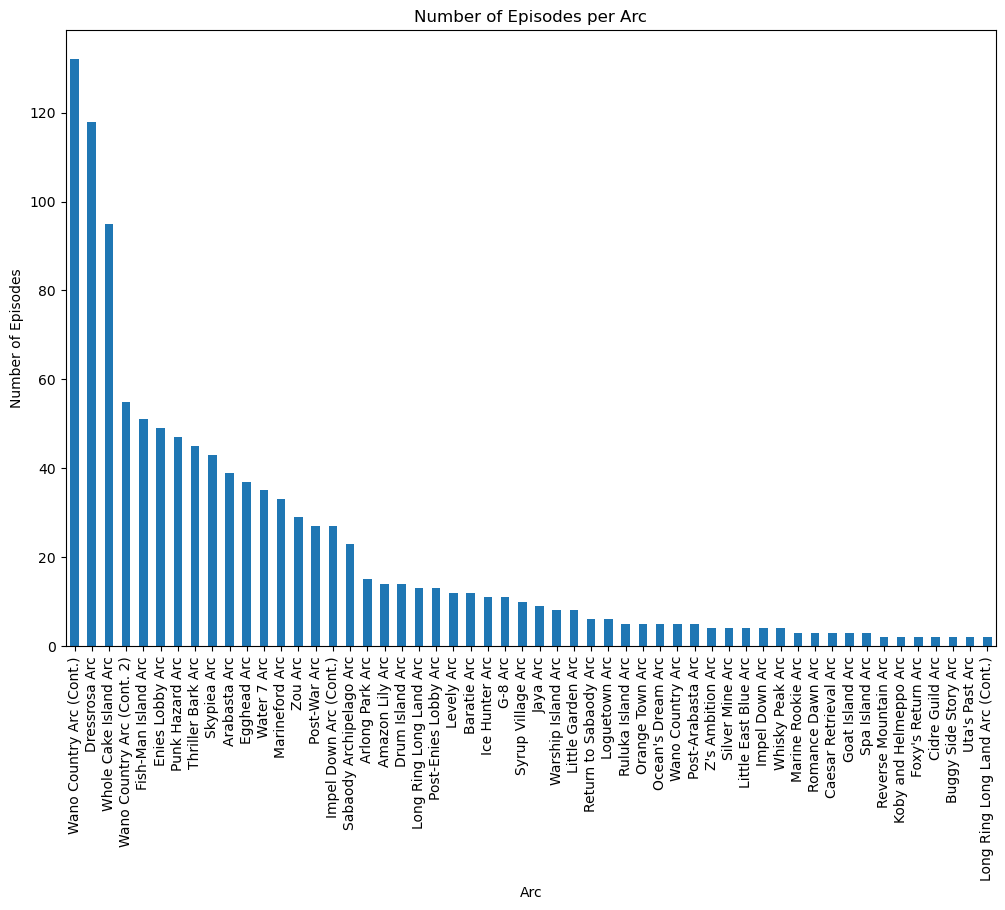

In [54]:
# visualizing episodes over arc

df['Arc'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Arc')
plt.xlabel('Arc')
plt.ylabel('Number of Episodes')
plt.show()

As we can see above, there are a number of Arcs that are continuation of other arcs, let us join them since, after all, they are the same arc

In [55]:
# Now let's remove (Cont.) and (Cont. 2) from the Arcs column
df['Arc'] = df['Arc'].str.replace('(Cont.)', '')
df['Arc'] = df['Arc'].str.replace('(Cont. 2)', '')
df['Arc'] = df['Arc'].str.replace('Arc ', 'Arc')

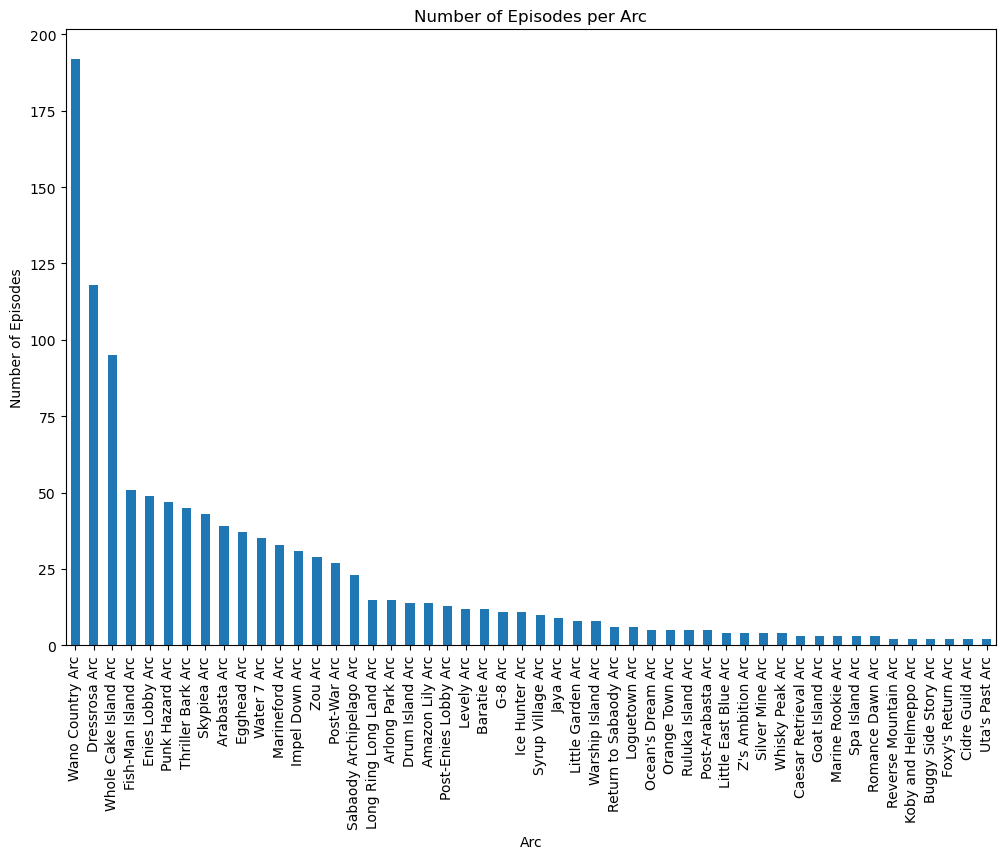

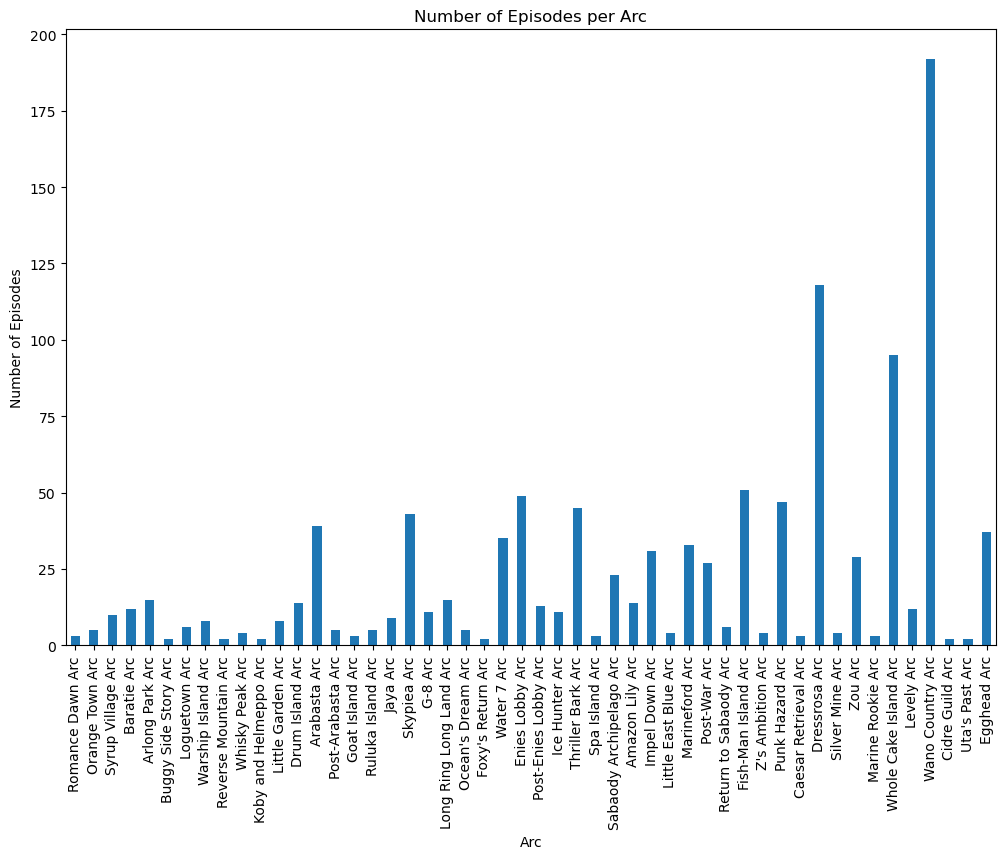

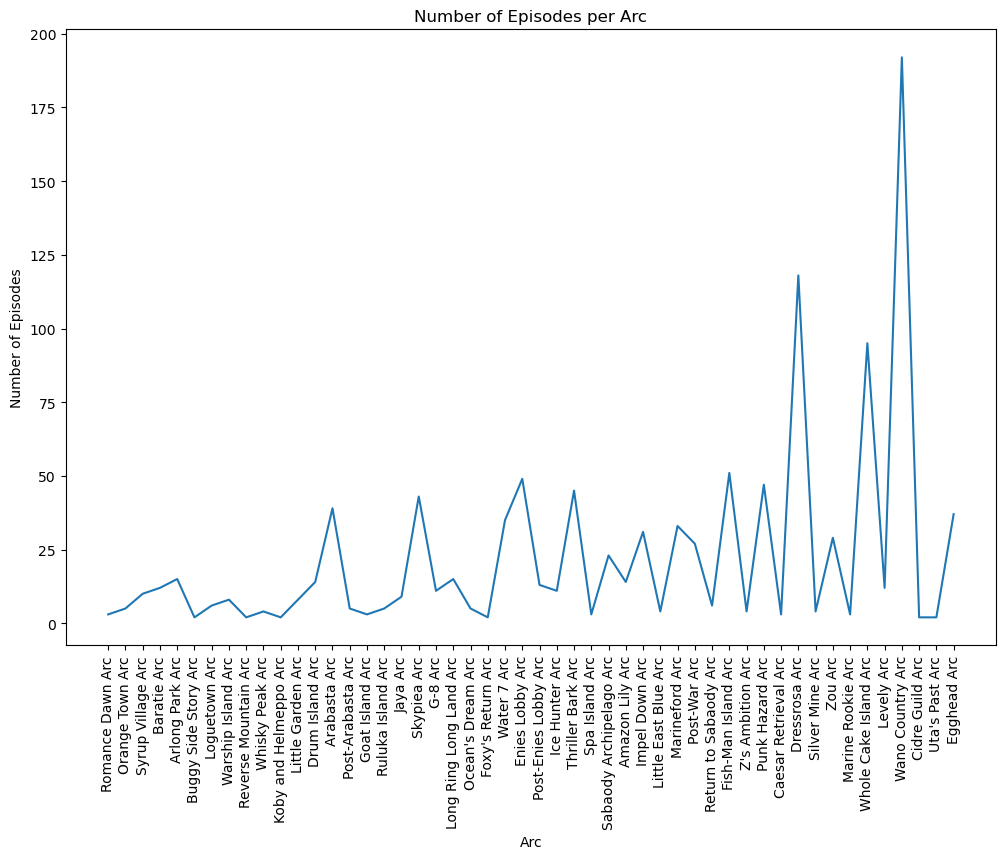

In [56]:
arc_counts = df['Arc'].value_counts()

# Plot the data
arc_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Arc')
plt.xlabel('Arc')
plt.ylabel('Number of Episodes')
plt.show()

arc_counts = arc_counts.loc[df['Arc'].unique()]

# Plot the data
arc_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Arc')
plt.xlabel('Arc')
plt.ylabel('Number of Episodes')
plt.show()

arc_counts.plot(figsize=(12, 8))
plt.title('Number of Episodes per Arc')
plt.xlabel('Arc')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=90, ticks=range(len(arc_counts)), labels=arc_counts.index )
plt.show()

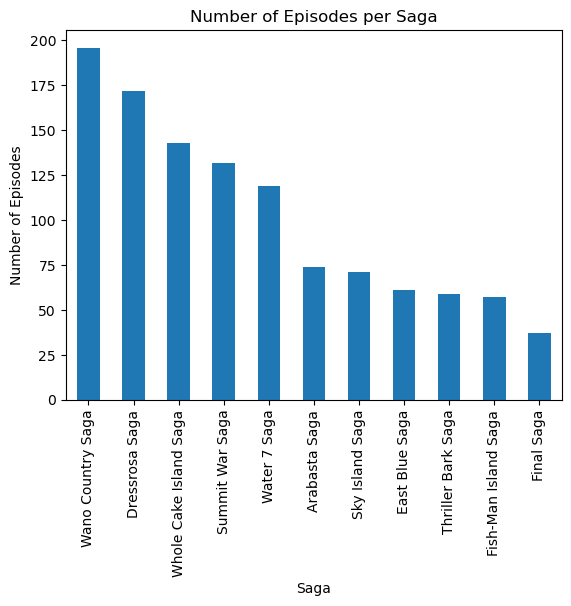

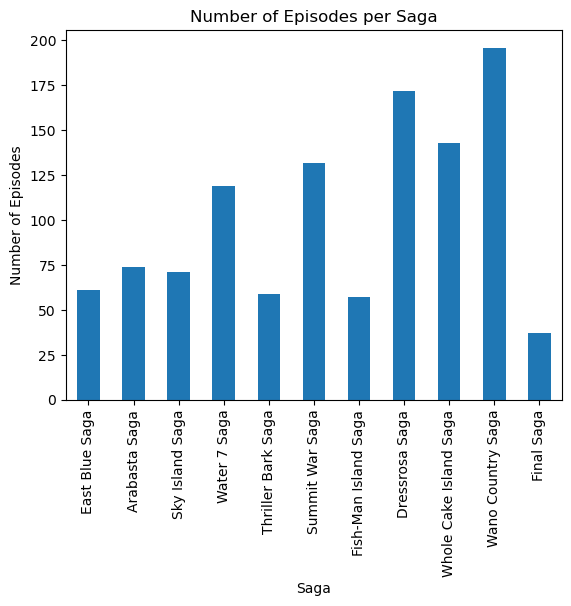

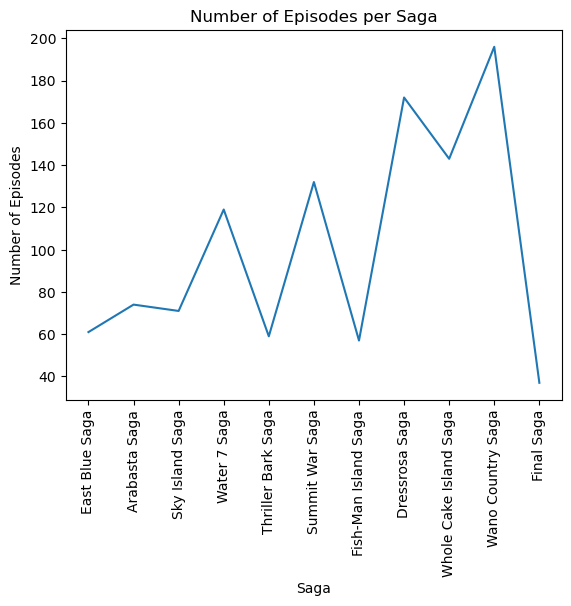

In [57]:
# Visualizing number of episodes over Saga

df['Saga'].value_counts().plot(kind='bar')
plt.title('Number of Episodes per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Episodes')
plt.show()

# Order it per appearance in the show
saga_counts = df['Saga'].value_counts()
saga_counts = saga_counts.loc[df['Saga'].unique()]

saga_counts.plot(kind='bar')
plt.title('Number of Episodes per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Episodes')
plt.show()

saga_counts.plot()
plt.title('Number of Episodes per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=90, ticks=range(len(saga_counts)), labels=saga_counts.index )
plt.show()

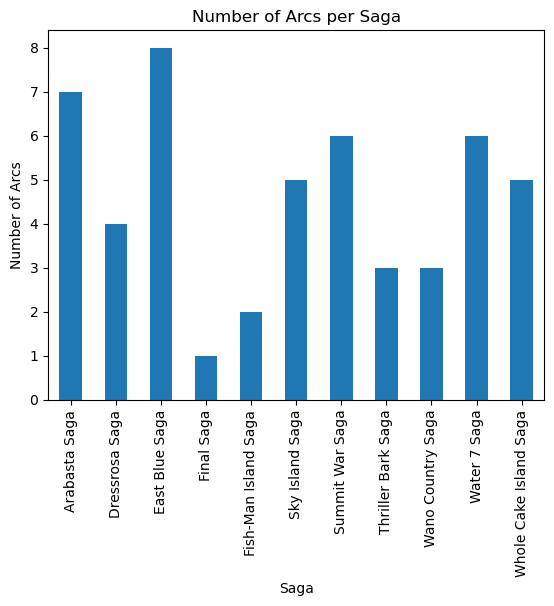

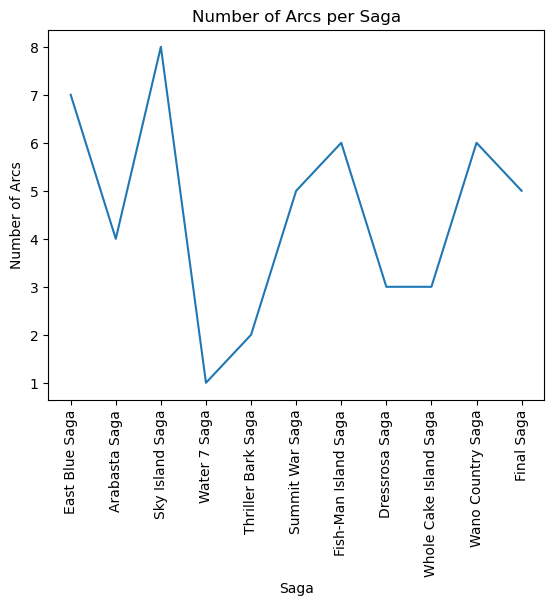

In [58]:
# Number of Arcs per Saga

# Group by Saga and count the number of unique arcs
df.groupby('Saga')['Arc'].nunique().plot(kind='bar')
plt.title('Number of Arcs per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Arcs')
plt.show()

df.groupby('Saga')['Arc'].nunique().plot()
plt.title('Number of Arcs per Saga')
plt.xlabel('Saga')
plt.ylabel('Number of Arcs')
plt.xticks(rotation=90, ticks=range(len(saga_counts)), labels=saga_counts.index)
plt.show()

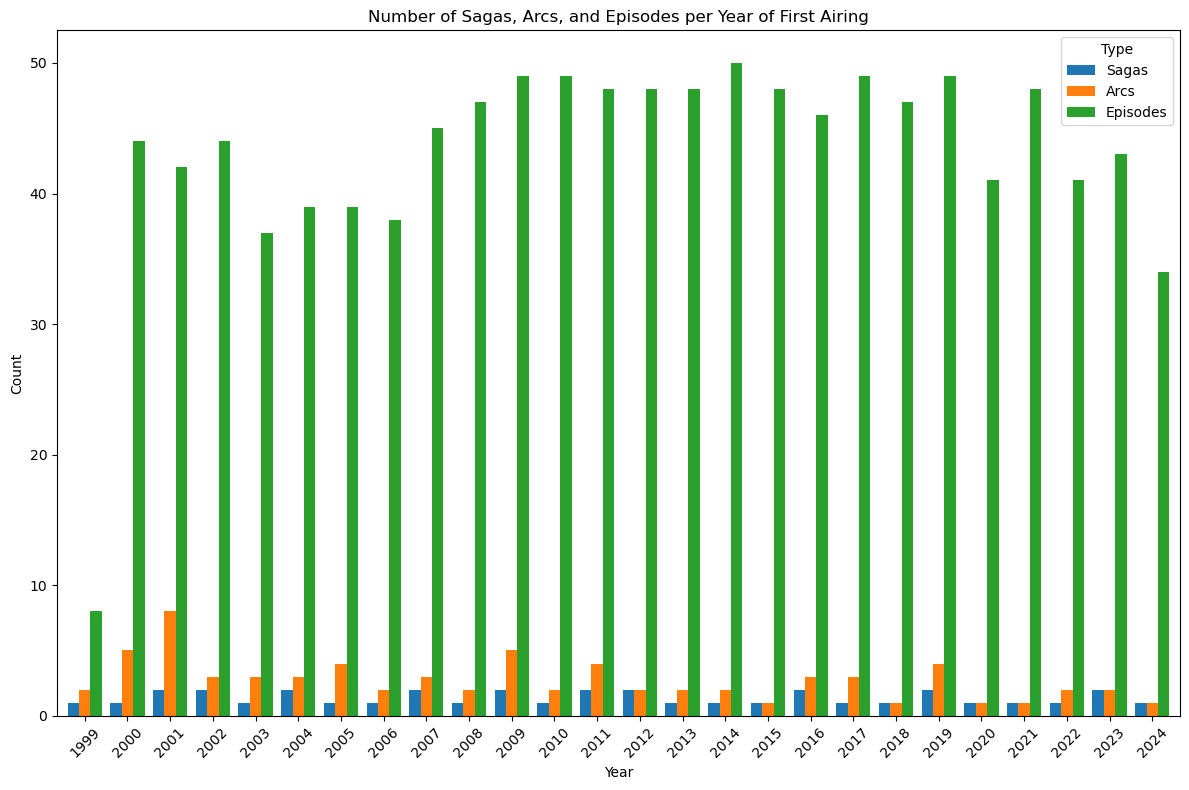

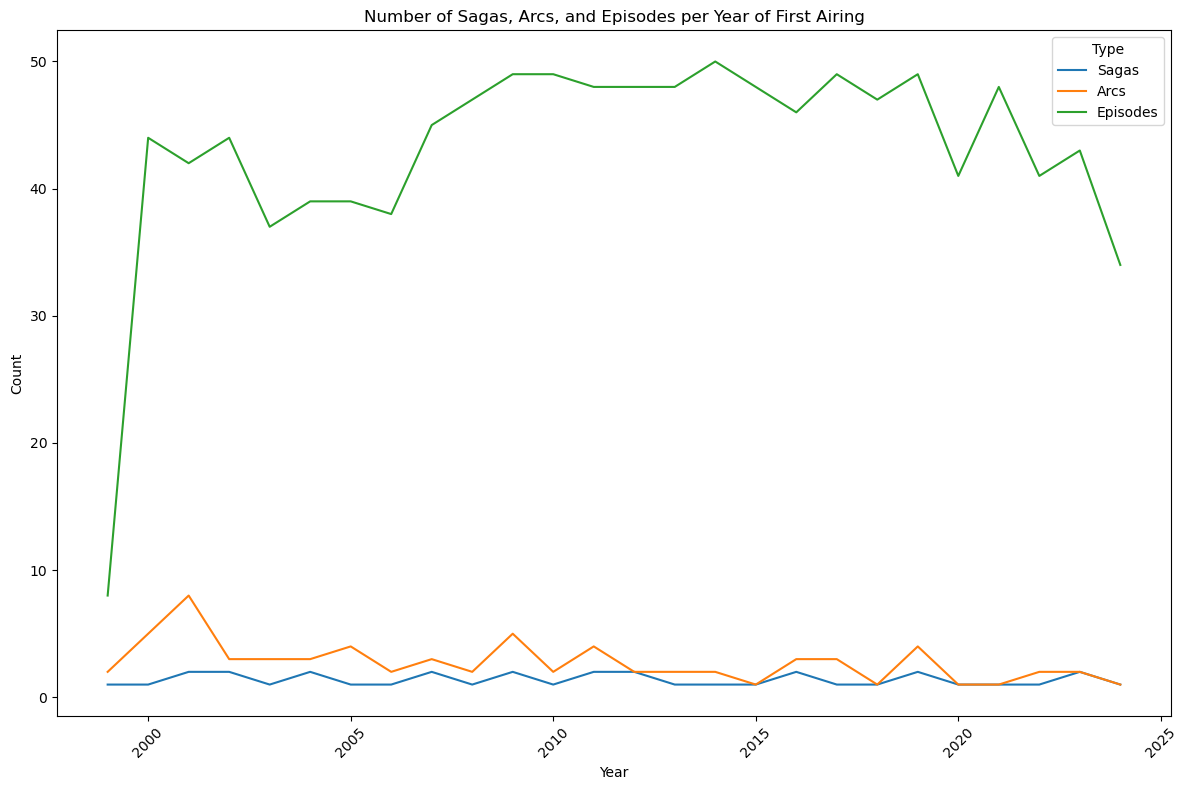

In [59]:
# Visualizing episodes, sagas and arcs over the Air Date year
df['airdate'] = pd.to_datetime(df['Air Date'])
df['airdate_year'] = df['airdate'].dt.year

sagas_per_year = df.groupby('airdate_year')['Saga'].nunique()
arcs_per_year = df.groupby('airdate_year')['Arc'].nunique()
eps_per_year = df['airdate_year'].value_counts().sort_index()

counts_df = pd.DataFrame({
    'Sagas': sagas_per_year,
    'Arcs': arcs_per_year,
    'Episodes': eps_per_year
}).fillna(0)

counts_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Number of Sagas, Arcs, and Episodes per Year of First Airing')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

counts_df.plot(figsize=(12, 8))
plt.title('Number of Sagas, Arcs, and Episodes per Year of First Airing')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

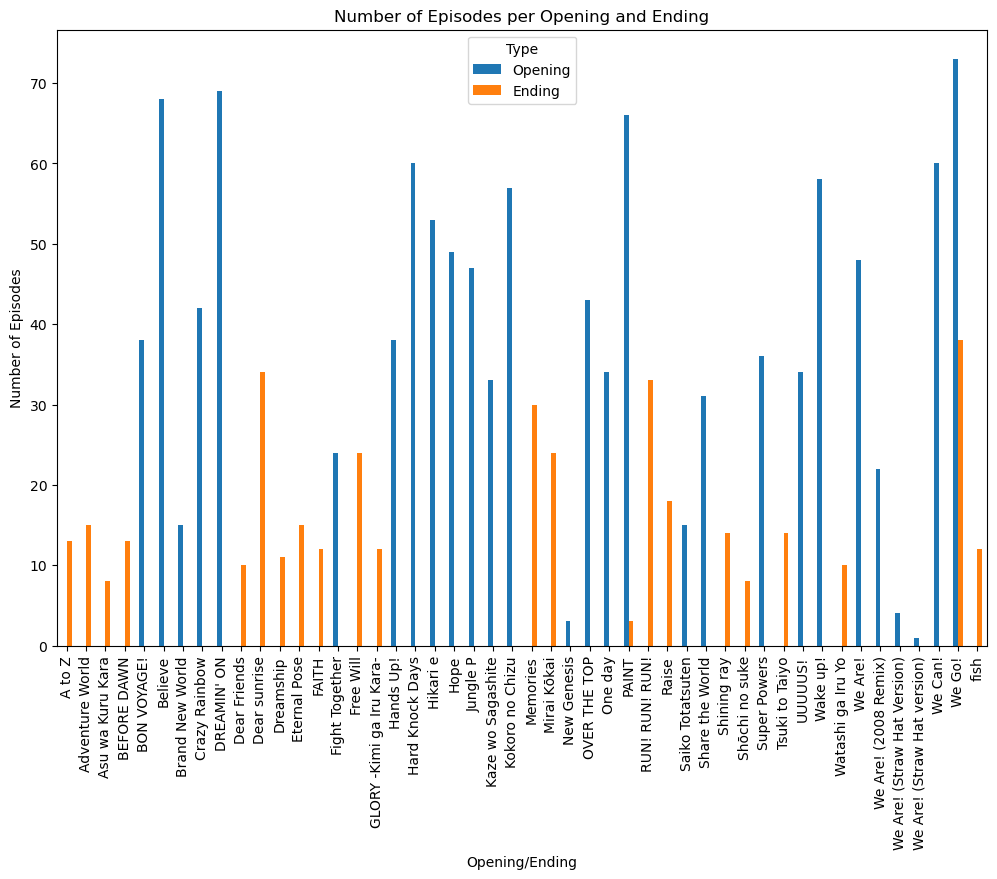

Number of unique openings:  28
Number of unique endings:  22


In [60]:
# Number of episodes with the same opening vs number of episodes with the same ending

# Get the counts for openings and endings
opening_counts = df['Opening'].value_counts()
ending_counts = df['Ending'].value_counts()

# Create a DataFrame with both counts
counts_df = pd.DataFrame({
    'Opening': opening_counts,
    'Ending': ending_counts
})

# Plot the grouped bar plot
counts_df.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Opening and Ending')
plt.xlabel('Opening/Ending')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Type')
plt.show()
print("Number of unique openings: ", df['Opening'].nunique())
print("Number of unique endings: ", df['Ending'].nunique())

As we can see above, there are 2 different opening that are the same, but due to their slight difference in uppercase vs lowercaser (Version vs version), they were counted as different, let us join them

Opening
We Go!                         73
DREAMIN' ON                    69
Believe                        68
PAINT                          66
Hard Knock Days                60
We Can!                        60
Wake up!                       58
Kokoro no Chizu                57
Hikari e                       53
Hope                           49
We Are!                        48
Jungle P                       47
OVER THE TOP                   43
Crazy Rainbow                  42
BON VOYAGE!                    38
Hands Up!                      38
Super Powers                   36
UUUUUS!                        34
One day                        34
Kaze wo Sagashite              33
Share the World                31
Fight Together                 24
We Are! (2008 Remix)           22
Brand New World                15
Saiko Totatsuten               15
We Are! (Straw Hat Version)     5
New Genesis                     3
Name: count, dtype: int64


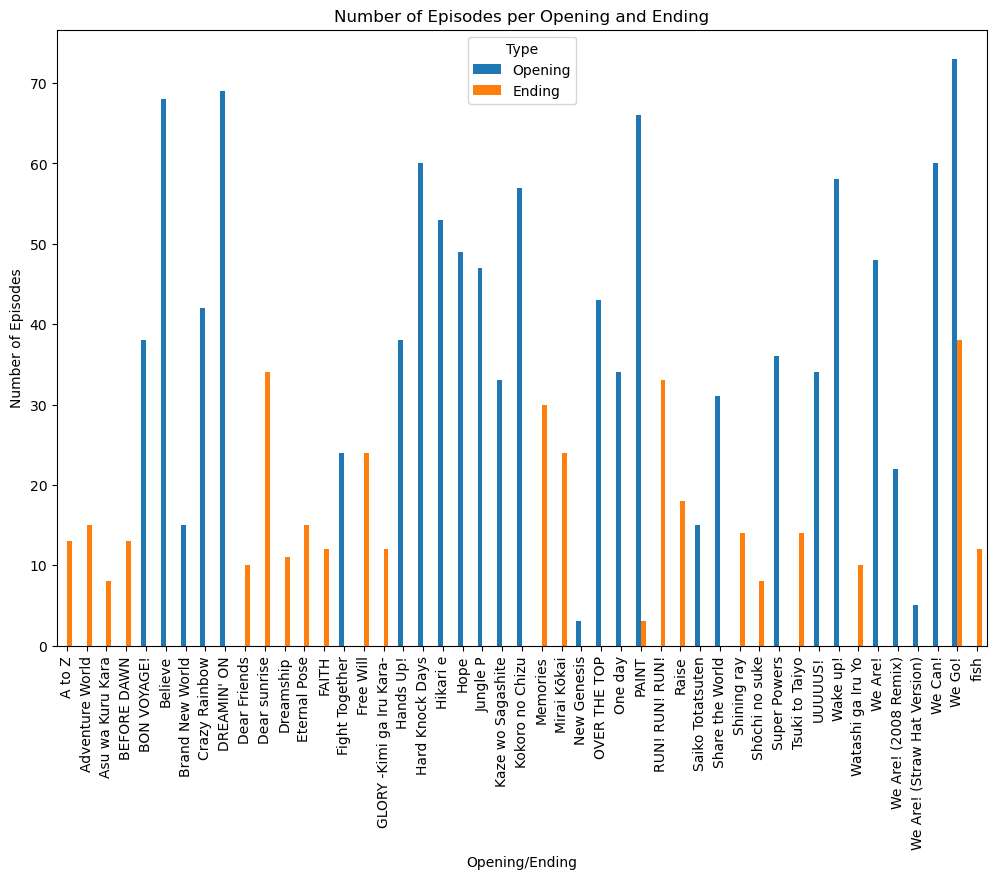

Number of unique openings:  27
Number of unique endings:  22


In [61]:
df['Opening'] = df['Opening'].replace('We Are! (Straw Hat version)', 'We Are! (Straw Hat Version)')
print(df['Opening'].value_counts())
opening_counts = df['Opening'].value_counts()
ending_counts = df['Ending'].value_counts()

#opening_counts =  opening_counts.loc[df['Opening'].unique()]
#ending_counts = ending_counts.loc[df['Ending'].unique()]

counts_df = pd.DataFrame({
    'Opening': opening_counts,
    'Ending': ending_counts
}).fillna(0)
counts_df.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Episodes per Opening and Ending')
plt.xlabel('Opening/Ending')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()
print("Number of unique openings: ", df['Opening'].nunique())
print("Number of unique endings: ", df['Ending'].nunique())

In [62]:
df.describe(include='all')

,Episode,Title,Season,Arc,Saga,Air Date,Opening,Ending,Summary,airdate,airdate_year
count,1121.000000,1121,1120.000000,1121,1121,1121,1121,371,1120,1121,1121.000000
unique,NaN,1121,NaN,50,11,1099,27,22,1120,NaN,NaN
top,NaN,I'm Luffy! The Man Who Will Become the Pirate ...,NaN,Wano Country Arc,Wano Country Saga,1999-12-29,We Go!,We Go!,Luffy is cast at sea in a barrel. Sailors on a...,NaN,NaN
freq,NaN,1,NaN,192,196,3,73,38,1,NaN,NaN
mean,561.517395,NaN,13.392857,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-05 19:53:21.784121344,2012.009813
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1999-10-20 00:00:00,1999.000000
25%,281.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-15 00:00:00,2006.000000
50%,562.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012-09-02 00:00:00,2012.000000
75%,842.000000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-24 00:00:00,2018.000000
max,1122.000000,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-13 00:00:00,2024.000000


In [63]:
# Check for exact missing values
missing_summary = df['Summary'].isna()
# Check for empty strings or strings with only whitespace
empty_summary = df['Summary'].str.strip() == ''
# Check for other errors
other_missing = df['Summary'].str.lower().isin(['none', 'n/a', 'null', ''])
# Combine all conditions
missing_summary_ep = df[missing_summary | empty_summary | other_missing]

print(missing_summary_ep)

      Episode                              Title  Season          Arc        Saga    Air Date  Opening        Ending Summary    airdate  airdate_year
1120     1122  The Last Lesson! Impact Inherited    21.0  Egghead Arc  Final Saga  2024-10-13  UUUUUS!  Dear sunrise     NaN 2024-10-13          2024


This episode hasn't aired yet as of today (11/10/2024) therefore we will remove it

In [64]:
df = df.dropna(subset=['Summary'])
df.describe(include='all')

,Episode,Title,Season,Arc,Saga,Air Date,Opening,Ending,Summary,airdate,airdate_year
count,1120.000000,1120,1119.000000,1120,1120,1120,1120,370,1120,1120,1120.000000
unique,NaN,1120,NaN,50,11,1098,27,22,1120,NaN,NaN
top,NaN,I'm Luffy! The Man Who Will Become the Pirate ...,NaN,Wano Country Arc,Wano Country Saga,1999-12-29,We Go!,We Go!,Luffy is cast at sea in a barrel. Sailors on a...,NaN,NaN
freq,NaN,1,NaN,192,196,3,73,38,1,NaN,NaN
mean,561.016964,NaN,13.386059,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-01 19:50:34.285714176,2011.999107
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1999-10-20 00:00:00,1999.000000
25%,280.750000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-13 06:00:00,2006.000000
50%,561.500000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-29 12:00:00,2012.000000
75%,841.250000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-18 18:00:00,2018.000000
max,1121.000000,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-06 00:00:00,2024.000000


In [65]:
missing_season = df['Season'].isna()
print(df[missing_season])

     Episode                                              Title  Season              Arc            Saga   Air Date Opening Ending                                            Summary    airdate  airdate_year
588      590  History's Strongest Collaboration vs. Glutton ...     NaN  Punk Hazard Arc  Dressrosa Saga  2013-04-7  We Go!    NaN  Featured characters of One Piece, Toriko, and ... 2013-04-07          2013


In [66]:
print(df['Season'].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan 17.
 18. 19. 20. 21.]


In [ ]:
df = df.drop(columns=['Air Date', 'airdate_year'])
print(df.head())

In [67]:
df.to_csv("data2.csv", index=False)